In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

df = pd.read_csv('BRA.csv')
df.head()


,Country,League,Season,Date,Time,Home,Away,HG,AG,Res,PH,PD,PA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA
0,Brazil,Serie A,2012,19/05/2012,22:30,Palmeiras,Portuguesa,1.0,1.0,D,1.75,3.86,5.25,1.76,3.87,5.31,1.69,3.50,4.90
1,Brazil,Serie A,2012,19/05/2012,22:30,Sport Recife,Flamengo RJ,1.0,1.0,D,2.83,3.39,2.68,2.83,3.42,2.70,2.59,3.23,2.58
2,Brazil,Serie A,2012,20/05/2012,01:00,Figueirense,Nautico,2.0,1.0,H,1.60,4.04,6.72,1.67,4.05,7.22,1.59,3.67,5.64
3,Brazil,Serie A,2012,20/05/2012,20:00,Botafogo RJ,Sao Paulo,4.0,2.0,H,2.49,3.35,3.15,2.49,3.39,3.15,2.35,3.26,2.84
4,Brazil,Serie A,2012,20/05/2012,20:00,Corinthians,Fluminense,0.0,1.0,A,1.96,3.53,4.41,1.96,3.53,4.41,1.89,3.33,3.89


In [2]:
df.columns = ['Paĩs',  'Liga', 'Temporada', 'Data', 'Horário', 'TimeCasa', 'TimeFora', 'GolsCasa', 'GolsFora', 'Res', 'ChanceCasa', 'ChanceEmpate', 'ChanceFora', 'MaxH', 'MaxD', 'MaxA', 'AvgH', 'AvgD', 'AvgA']
df.head()

,Paĩs,Liga,Temporada,Data,Horário,TimeCasa,TimeFora,GolsCasa,GolsFora,Res,ChanceCasa,ChanceEmpate,ChanceFora,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA
0,Brazil,Serie A,2012,19/05/2012,22:30,Palmeiras,Portuguesa,1.0,1.0,D,1.75,3.86,5.25,1.76,3.87,5.31,1.69,3.50,4.90
1,Brazil,Serie A,2012,19/05/2012,22:30,Sport Recife,Flamengo RJ,1.0,1.0,D,2.83,3.39,2.68,2.83,3.42,2.70,2.59,3.23,2.58
2,Brazil,Serie A,2012,20/05/2012,01:00,Figueirense,Nautico,2.0,1.0,H,1.60,4.04,6.72,1.67,4.05,7.22,1.59,3.67,5.64
3,Brazil,Serie A,2012,20/05/2012,20:00,Botafogo RJ,Sao Paulo,4.0,2.0,H,2.49,3.35,3.15,2.49,3.39,3.15,2.35,3.26,2.84
4,Brazil,Serie A,2012,20/05/2012,20:00,Corinthians,Fluminense,0.0,1.0,A,1.96,3.53,4.41,1.96,3.53,4.41,1.89,3.33,3.89


In [3]:
# Verificar se há valores ausentes e tratar, se necessário
df.isnull().sum()
df = df.dropna()
# numero de linhas e colunas
df.shape

(4269, 19)

In [4]:
# Verificar se há valores NaN
print(df.isnull().any())

Paĩs            False
Liga            False
Temporada       False
Data            False
Horário         False
TimeCasa        False
TimeFora        False
GolsCasa        False
GolsFora        False
Res             False
ChanceCasa      False
ChanceEmpate    False
ChanceFora      False
MaxH            False
MaxD            False
MaxA            False
AvgH            False
AvgD            False
AvgA            False
dtype: bool


In [5]:
# tipos de dados
df.dtypes

Paĩs             object
Liga             object
Temporada         int64
Data             object
Horário          object
TimeCasa         object
TimeFora         object
GolsCasa        float64
GolsFora        float64
Res              object
ChanceCasa      float64
ChanceEmpate    float64
ChanceFora      float64
MaxH            float64
MaxD            float64
MaxA            float64
AvgH            float64
AvgD            float64
AvgA            float64
dtype: object

In [6]:
# Calcular o total de gols feitos por cada time
gols_por_time = df.groupby('TimeCasa')['GolsCasa'].sum() + df.groupby('TimeFora')['GolsFora'].sum()


In [7]:
# Ordenar os times por total de gols
gols_por_time = gols_por_time.sort_values(ascending=False)

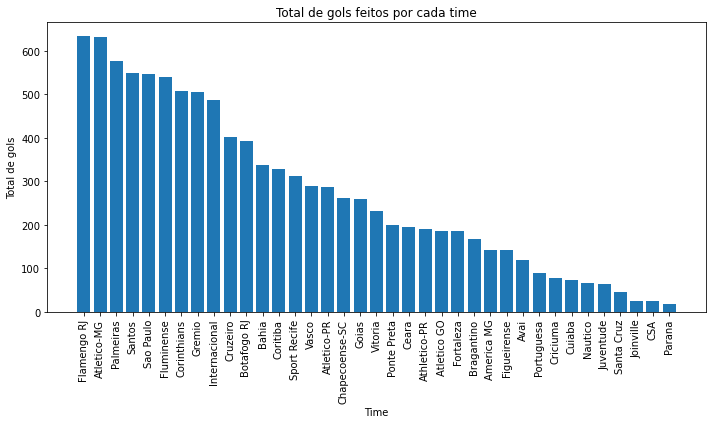

In [8]:
# Criar o gráfico ordenado
plt.figure(figsize=(10, 6))
plt.bar(gols_por_time.index, gols_por_time.values)
plt.xlabel('Time')
plt.ylabel('Total de gols')
plt.title('Total de gols feitos por cada time')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [9]:
# Filtrar apenas as vitórias
vitorias = df[df['Res'] == 'Vitória']

In [10]:
# Contar o número de vitórias por time
vitorias_por_time = vitorias['TimeCasa'].value_counts() + vitorias['TimeFora'].value_counts()

In [11]:
# Ordenar os times por número de vitórias
vitorias_por_time = vitorias_por_time.sort_values(ascending=False)

In [12]:
# Pré-processamento dos dados
df['Res'] = df['Res'].map({'H': 'Vitória', 'D': 'Empate', 'A': 'Derrota'})

In [13]:
# Divisão dos dados em treinamento e teste
X = df[['ChanceCasa', 'ChanceEmpate', 'ChanceFora']]
y = df['Res']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Treinamento do modelo de Árvore de Decisão
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [18]:
# Dados do novo confronto a ser previsto
chance_casa_novo = 0.6
chance_empate_novo = 0.2
chance_fora_novo = 0.2

In [19]:
# Previsão do resultado do novo confronto
resultado_previsto = model.predict([[chance_casa_novo, chance_empate_novo, chance_fora_novo]])

print("Resultado previsto do novo confronto: ", resultado_previsto[0])


Resultado previsto do confronto: Vitória


/home/diogo/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
